Learn Probability Density Functions using Roll-Number-Parameterized Non-Linear Model

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [38]:
csv_path="/content/data.csv"
df=pd.read_csv(csv_path,encoding="latin1")
df.head()

/tmp/ipython-input-3174377292.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(csv_path,encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [39]:
x=pd.to_numeric(df["no2"],errors="coerce")
x=x.dropna()
x=x[x>=0]
x=x.to_numpy(dtype=np.float64)
print(len(x))

419509


In [40]:
roll=102317229
a_r=0.05*(roll%7)
b_r=0.3*((roll%5)+1)
print(a_r,b_r)

0.0 1.5


In [41]:
z=x+a_r*np.sin(b_r*x)
print(len(z),z.min(),z.max())

419509 0.0 876.0


In [43]:
mu=float(np.mean(z))
variance=float(np.mean((z-mu)**2))
lam=float(1.0/(2.0*variance))
c=float(np.sqrt(lam/np.pi))
print("Estimated Parameters")
print(f"mu={mu}")
print(f"lambda={lam}")
print(f"c={c}")

Estimated Parameters
mu=25.809622897811263
lambda=0.001460436525489001
c=0.021560876239314918


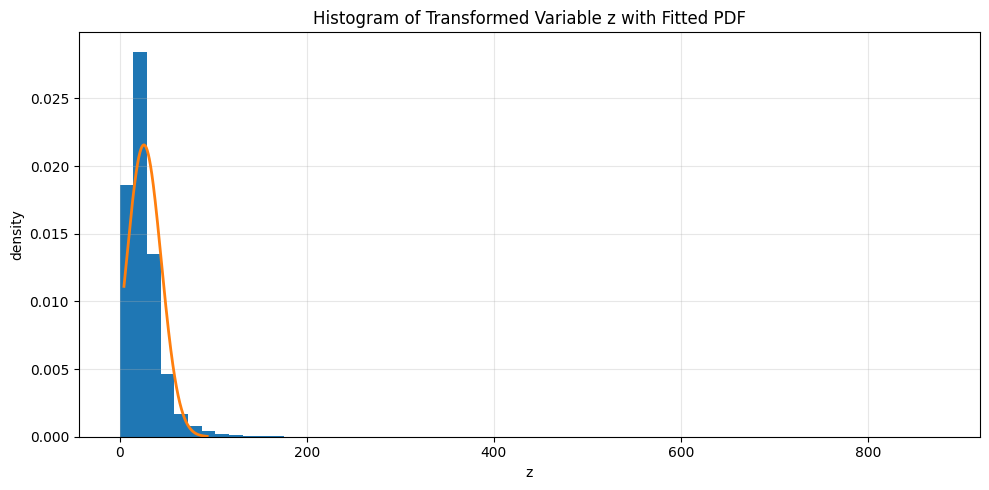

In [46]:
def pdf_estimate(z,lam,mu,c):
    return c*np.exp(-lam*(z-mu)**2)

z_grid=np.linspace(np.percentile(z,1),np.percentile(z,99),500)
pdf_vals=pdf_estimate(z_grid,lam,mu,c)

out_dir=Path("outputs")
out_dir.mkdir(exist_ok=True)

plt.figure(figsize=(10,5))
plt.hist(z,bins=60,density=True)
plt.plot(z_grid,pdf_vals,linewidth=2)
plt.xlabel("z")
plt.ylabel("density")
plt.title("Histogram of Transformed Variable z with Fitted PDF")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig(out_dir/"fit_plot.png",dpi=200)
plt.show()

In [48]:
summary=pd.DataFrame([{
    "roll_number":roll,
    "a_r":a_r,
    "b_r":b_r,
    "mu":mu,
    "lambda":lam,
    "c":c,
    "samples":len(z)
}])

out_dir=Path("outputs")
out_dir.mkdir(exist_ok=True)
summary.to_csv(out_dir/"estimated_parameters.csv",index=False)
print("Saved")

Saved
